## Analyzing Amazon Data
Figured out the total amount of money you’ve spent on Amazon, ever.

Found your most and least expensive orders, and your average and median order totals.

Figured out how much you’ve paid in taxes, and your effective sales tax rate on Amazon.

Visualized your spending habits day-by-day in a bar graph.

Customized some elements of the bar graph, like size and colors.

In [12]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [15]:
import requests as req



In [17]:
with req.get('https://www.dataquest.io/wp-content/uploads/2019/09/amazon-orders.csv') as rq:
    
    with open('my_csv.csv1','wb') as file:
        file.write(rq.content)

#We’ll be using pandas for most of our analysis, so our first step will be to import the pandas package and give it the nickname pd so that we can refer to it more easily in our code.


In [ ]:
import pandas as pd

In [19]:
#create a new variable called df, short for DataFrame, and then tell pandas to store our Amazon data in in that variable

df = pd.read_csv('my_csv.csv')


In [20]:
#pandas function called .head() to look at the first five rows our our data, which will give us a taste of what we’re working with, and what kinds of data Amazon’s order history includes.
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,NaN
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,NaN
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,NaN
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,NaN,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,NaN
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,NaN


In [21]:
#we want to get a readout of the full size of our data set, we can use df.shape. This gives us the dimensions of our DataFrame
df.shape

(59, 23)

## Cleaning the Data

In [22]:

#we’ll need to do a little bit of data cleaning here before we can do our analysis and find out the total sum we’ve spent on Amazon.
#We don’t just want to replace those values temporarily! We want to replace them and then store that version of the DataFrame as our new DataFrame.

df= df.fillna(0) #to replace the values and re-define our df variable to point to that new dataframe.
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,0.0


In [25]:
#The prices in this data set have been stored as strings, which means the computer is seeing them as a series of characters, 
#rather than numbers that it can add together. They also include the character $, which isn’t a number.
df['Total Charged'] = df['Total Charged'].str.replace('$','').astype(float)
df.head()


<ipython-input-25-6581cf1641d8>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Total Charged'] = df['Total Charged'].str.replace('$','').astype(float)


,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,14.99,Your Name,0.0


## Data Analysis

In [26]:
df['Total Charged'].sum()

1777.7300000000002

In [ ]:
# Calculating Other Things: Average Spend on Amazon, Biggest Purchase, Etc.

In [27]:
df['Total Charged'].mean()

30.131016949152542

In [28]:
df['Total Charged'].median()

15.95

In [29]:
df['Total Charged'].max()

210.99

In [30]:
df['Total Charged'].min()

1.04

In [ ]:
#How Much Have I Paid in Sales Tax?

In [32]:
df["Tax Charged"]=df["Tax Charged"].str.replace('$','').astype(float)
df.head()

<ipython-input-32-bcb2fba04cc1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Tax Charged"]=df["Tax Charged"].str.replace('$','').astype(float)


,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,1.93,36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,0.00,16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,0.00,9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,8.14,156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,0.00,14.99,Your Name,0.0


In [33]:
#total sum of taxes
df["Tax Charged"].sum()

52.60999999999999

In [34]:
#mean of taxes
df["Tax Charged"].mean()

0.8916949152542372

In [35]:
#max taxes paid
df["Tax Charged"].max()

11.0

In [36]:
#min taxes
df["Tax Charged"].min()

0.0

In [37]:
#median taxes
df["Tax Charged"].median()

0.0

# Analyzing Amazon Spending Over Time

In [41]:
# we need to convert them to a datetime data type, so that the computer can recognize them as dates
#We can use .pd.to_datetime() and specify the column we want to modify within those brackets to tell pandas to read that column as dates.
df['Order Date']= pd.to_datetime(df['Order Date'])
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,2019-04-01,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,1.93,36.93,Your Name,0.0
1,2019-04-01,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,0.00,16.99,Your Name,0.0
2,2019-04-01,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,0.00,9.99,Your Name,0.0
3,2019-04-04,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,8.14,156.12,Your Name,0.0
4,2019-04-05,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,0.00,14.99,Your Name,0.0


# Data Visualization

In [42]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='Order Date'>

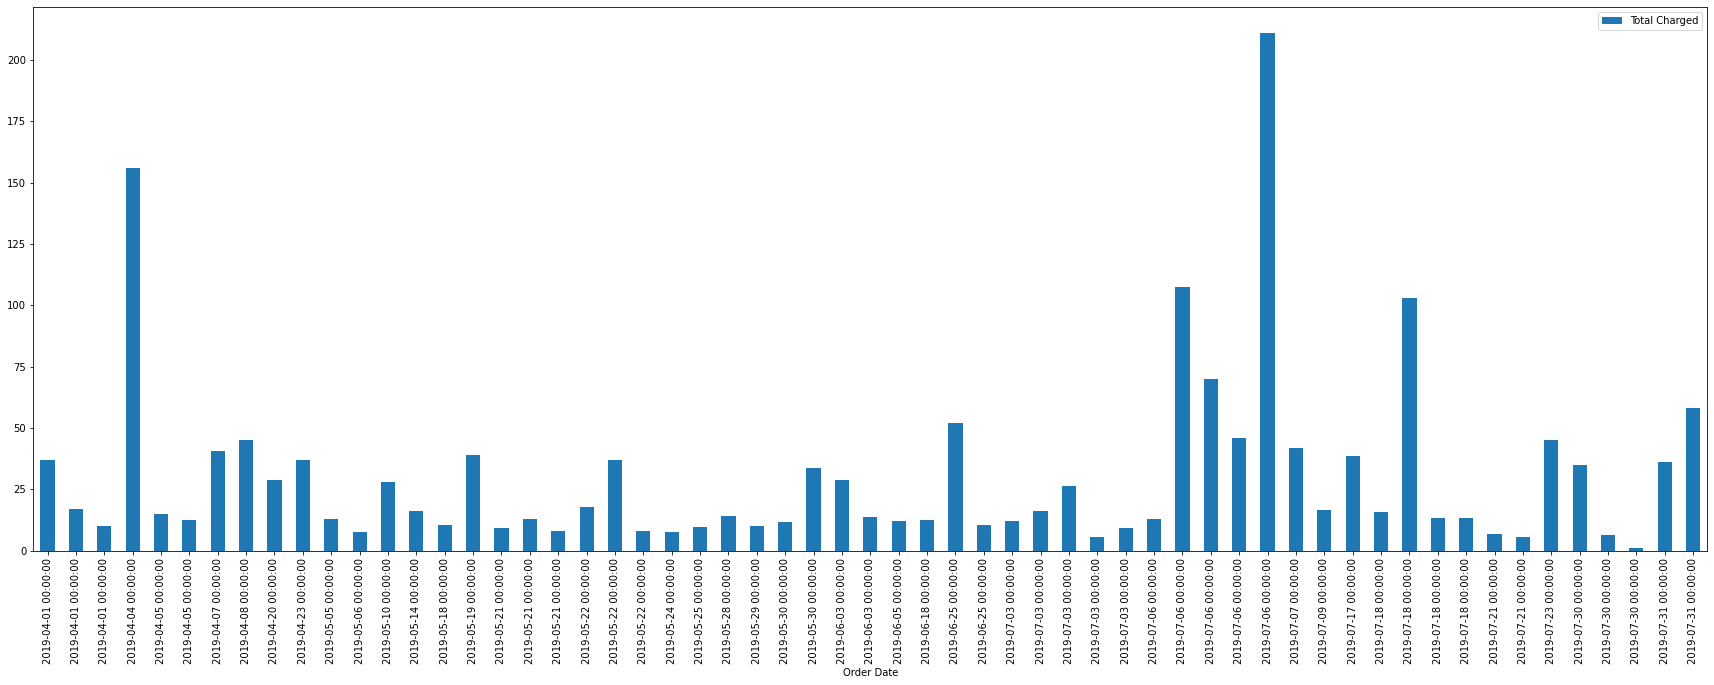

In [47]:
#can make a basic bar graph in a pretty straightforward way using df.plot.bar().

df.plot.bar(x='Order Date',y='Total Charged', figsize=(30,10))

In [49]:
#We want to group our data by 'Order Date', so that all the orders that share the same date are counted in a single row (i.e., we want one row for April 1, rather than three). 2. We want to get the sum of the prices paid in 'Total Charged' column for each date and make it the value for 'Total Charged'
daily_orders=df.groupby('Order Date').sum()['Total Charged']
daily_orders.head()

Order Date
2019-04-01     63.91
2019-04-04    156.12
2019-04-05     27.64
2019-04-07     40.63
2019-04-08     44.99
Name: Total Charged, dtype: float64

<AxesSubplot:xlabel='Order Date'>

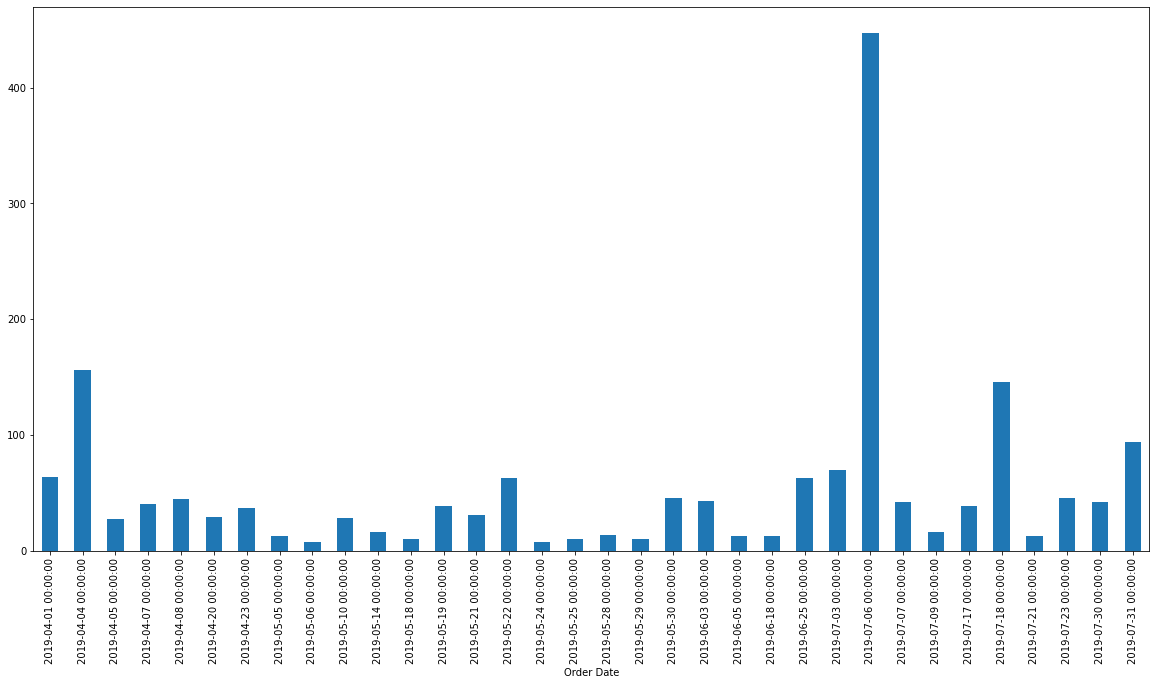

In [50]:
daily_orders.plot.bar(figsize=(20,10))